In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [160]:
df = pd.read_csv('./csv/IBM_financial_data_hourly.csv')
df.head()

,timestamp,open,high,low,close,volume
0,2023-09-18,145.77,146.48,145.06,145.09,2508062
1,2023-09-15,147.11,147.85,145.53,145.99,6234033
2,2023-09-14,147.38,147.73,146.48,147.35,2723200
3,2023-09-13,145.95,146.98,145.92,146.55,2627999
4,2023-09-12,147.92,148.00,145.80,146.30,4457695


In [161]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  100 non-null    datetime64[ns]
 1   open       100 non-null    float64       
 2   high       100 non-null    float64       
 3   low        100 non-null    float64       
 4   close      100 non-null    float64       
 5   volume     100 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.8 KB


In [163]:
df

,timestamp,open,high,low,close,volume
0,2023-09-18,145.77,146.480,145.060,145.09,2508062
1,2023-09-15,147.11,147.850,145.530,145.99,6234033
2,2023-09-14,147.38,147.730,146.480,147.35,2723200
3,2023-09-13,145.95,146.980,145.920,146.55,2627999
4,2023-09-12,147.92,148.000,145.800,146.30,4457695
...,...,...,...,...,...,...
95,2023-05-02,126.30,126.450,123.270,125.16,4445283
96,2023-05-01,126.35,126.750,126.060,126.09,2724992
97,2023-04-28,126.58,127.250,125.640,126.41,5061247
98,2023-04-27,126.37,127.020,125.455,126.97,3204889


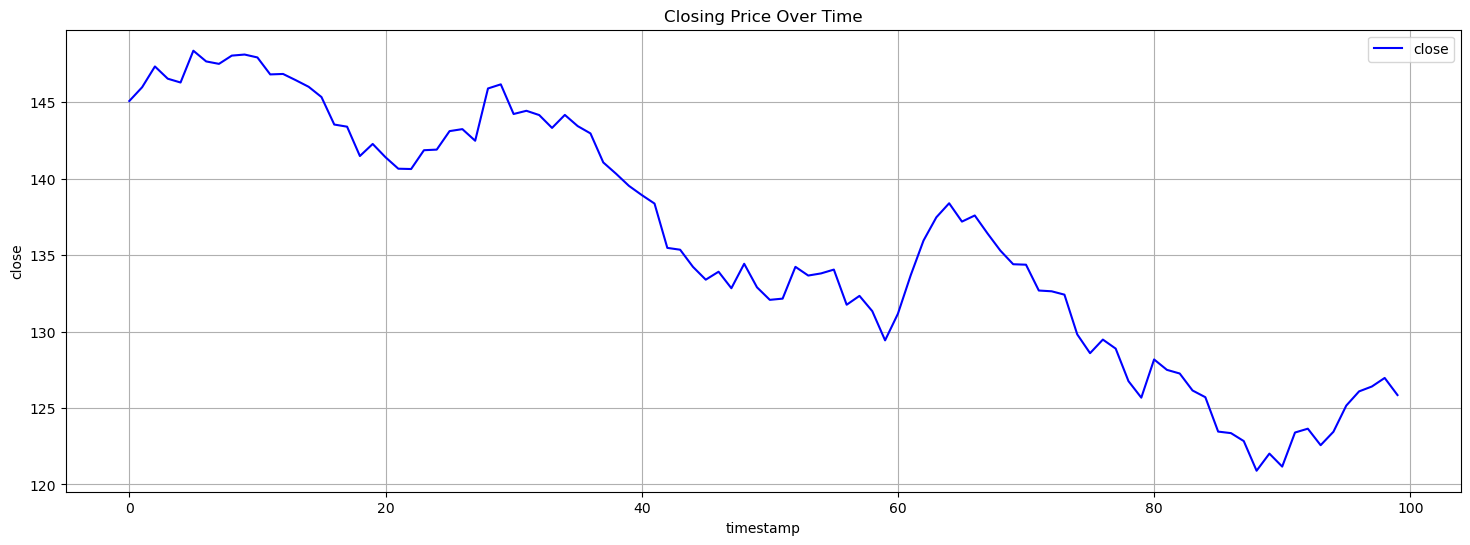

In [167]:
plt.figure(figsize=(18, 6))
plt.plot(df['close'], label='close', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('timestamp')
plt.ylabel('close')
plt.legend()
plt.grid(True)
plt.show()

In [165]:
df['returns'] = df['close'].pct_change()
df

,timestamp,open,high,low,close,volume,returns
0,2023-09-18,145.77,146.480,145.060,145.09,2508062,NaN
1,2023-09-15,147.11,147.850,145.530,145.99,6234033,0.006203
2,2023-09-14,147.38,147.730,146.480,147.35,2723200,0.009316
3,2023-09-13,145.95,146.980,145.920,146.55,2627999,-0.005429
4,2023-09-12,147.92,148.000,145.800,146.30,4457695,-0.001706
...,...,...,...,...,...,...,...
95,2023-05-02,126.30,126.450,123.270,125.16,4445283,0.013852
96,2023-05-01,126.35,126.750,126.060,126.09,2724992,0.007430
97,2023-04-28,126.58,127.250,125.640,126.41,5061247,0.002538
98,2023-04-27,126.37,127.020,125.455,126.97,3204889,0.004430


<Figure size 1800x600 with 0 Axes>

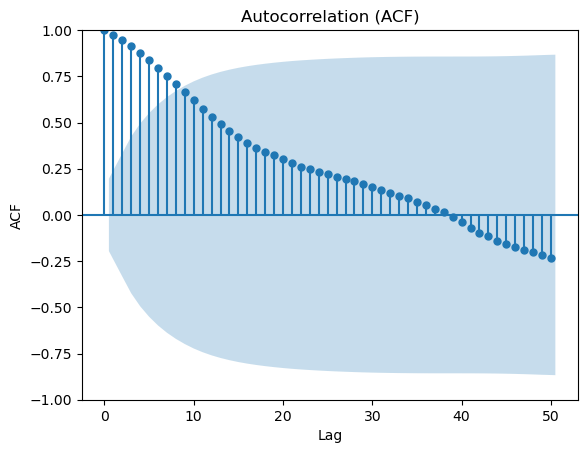

<Figure size 1800x600 with 0 Axes>

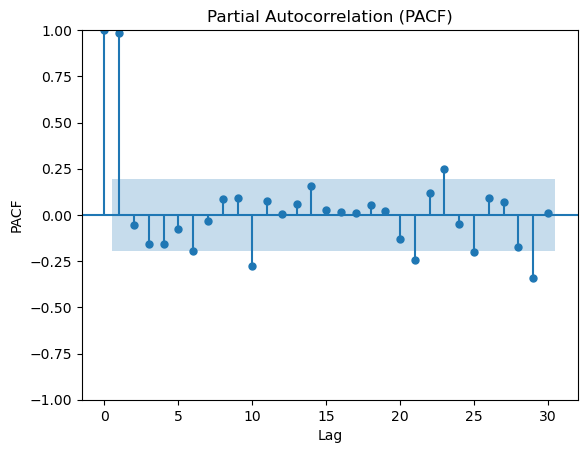

In [169]:
plt.figure(figsize=(18, 6))
plot_acf(df['close'], lags=50)
plt.title('Autocorrelation (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(18, 6))
plot_pacf(df['close'], lags=30)
plt.title('Partial Autocorrelation (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

In [170]:
df_copy = df.copy()
df_copy.set_index('timestamp', inplace=True)
df_copy

,open,high,low,close,volume,returns
timestamp,,,,,,
2023-09-18,145.77,146.480,145.060,145.09,2508062,NaN
2023-09-15,147.11,147.850,145.530,145.99,6234033,0.006203
2023-09-14,147.38,147.730,146.480,147.35,2723200,0.009316
2023-09-13,145.95,146.980,145.920,146.55,2627999,-0.005429
2023-09-12,147.92,148.000,145.800,146.30,4457695,-0.001706
...,...,...,...,...,...,...
2023-05-02,126.30,126.450,123.270,125.16,4445283,0.013852
2023-05-01,126.35,126.750,126.060,126.09,2724992,0.007430
2023-04-28,126.58,127.250,125.640,126.41,5061247,0.002538


In [171]:
test_result=adfuller(df_copy['close'])
adf = test_result[0]
p = test_result[1]
print(f'Adf: {adf}')
print(f'p-value: {p}')

Adf: -0.6444174605663957
p-value: 0.8606264044493668


In [172]:
model = sm.tsa.arima.ARIMA(df['close'], order=(1,1,1))
result = model.fit()
result.summary()

c:\Users\peekk\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\peekk\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -160.420
Date:                Tue, 19 Sep 2023   AIC                            326.840
Time:                        18:18:51   BIC                            334.625
Sample:                             0   HQIC                           329.990
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7607      0.369      2.063      0.039       0.038       1.483
ma.L1         -0.6670      0.439     -1.520      0.129      -1.527       0.193
sigma2         1.4956      0.217      6.877      0.000       1.069       1.922
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 3.74
Prob(Q):                              0.58   Prob(JB):                         0.15
Heteroskedasticity (H):               1.30   Skew:                             0.47
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [176]:
# Example SARIMA order: (p, d, q) x (P, D, Q, S)
p, d, q = 1, 1, 1  # Non-seasonal order
P, D, Q, S = 2, 1, 1, 7  # Seasonal order for weekly data (S=7 for weekly seasonality)

# Create and fit the SARIMA model
sarima_model = SARIMAX(df['close'], order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_result = sarima_model.fit()
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             close   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 7)   Log Likelihood                -158.362
Date:                           Tue, 19 Sep 2023   AIC                            328.724
Time:                                   18:19:31   BIC                            343.855
Sample:                                        0   HQIC                           334.831
                                           - 100                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7386      0.526      1.404      0.160      -0.292       1.770
ma.L1         -0.6404      0.586     -1.092      0.275      -1.790       0.509
ar.S.L7        0.0010      0.205      0.005      0.996      -0.401       0.403
ar.S.L14       0.0613      0.156      0.392      0.695      -0.245       0.368
ma.S.L7       -0.9970      8.346     -0.119      0.905     -17.354      15.360
sigma2         1.5148     12.446      0.122      0.903     -22.879      25.909
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 2.91
Prob(Q):                              0.70   Prob(JB):                         0.23
Heteroskedasticity (H):               1.16   Skew:                             0.44
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [177]:
forecast_steps = 50  # Number of future time points to forecast
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Get forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

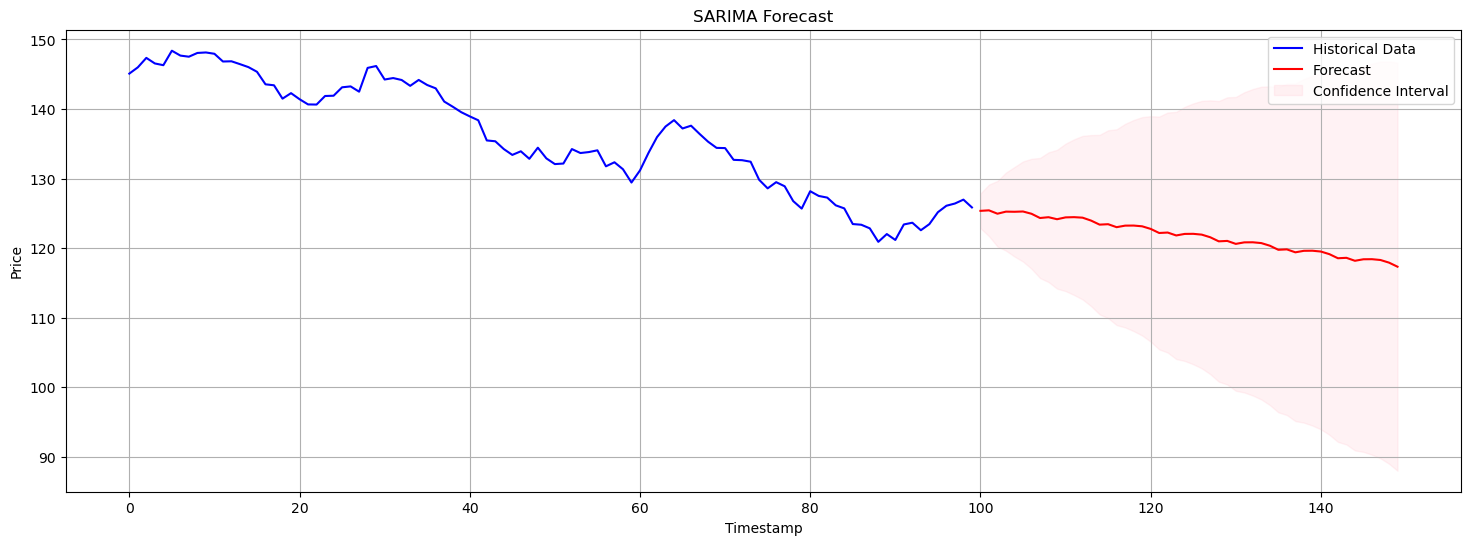

In [179]:
plt.figure(figsize=(18, 6))
plt.plot(df['close'], label='Historical Data', color='blue')
plt.plot(forecast_values.index, forecast_values.values, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2, label='Confidence Interval')
plt.title('SARIMA Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()